In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataset1 = pd.read_csv('span_feb_28.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>=30.0) & (dataset1['final_teamsize'] >= 2)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>=30.0) & (dataset1['final_teamsize'] >= 2)]
print(data_neg.shape)
print(data_pos.shape)

(8086, 100)
(2461, 100)


In [6]:
dataset = pd.read_csv('span_feb_28.csv',delimiter = ',')
dataset = dataset.loc[(dataset['proj_span'] >= 30.0) & (dataset['final_teamsize'] >= 2)]


In [56]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(10547, 100)

In [60]:

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
activity_intensity,10547.0,0.215348,0.589705,0.001468,0.027027,0.070796,0.195079,29.613683
activity_intensity_Q1,10547.0,0.259294,1.313745,0.001468,0.027145,0.071429,0.200000,108.911357
activity_intensity_Q2,10547.0,0.210542,0.602704,0.001468,0.026857,0.069790,0.187500,25.500000
activity_intensity_Q3,10547.0,0.210691,0.636025,0.001468,0.026882,0.070000,0.189798,38.789862
activity_intensity_Q4,10547.0,0.206053,0.525491,0.001468,0.025381,0.067524,0.184333,15.625000
class,10547.0,0.233336,0.422975,0.000000,0.000000,0.000000,0.000000,1.000000
contribution_30_10_percentage,10547.0,0.091162,0.178907,0.000000,0.000000,0.000000,0.111111,1.000000
contribution_50_30_percentage,10547.0,0.123078,0.273893,0.000000,0.000000,0.000000,0.076923,1.000000
contribution_below_10_percentage,10547.0,0.074800,0.155117,0.000000,0.000000,0.006061,0.076923,1.000000
contribution_over_50,10547.0,0.690338,0.462376,0.000000,0.000000,1.000000,1.000000,1.000000


In [9]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=20190101)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=20190101)
print('training size: ', X_tr.shape[0])
print('validation size: ', X_val.shape[0])
print('test size: ', X_test.shape[0])

training size:  6327
validation size:  2110
test size:  2110


In [10]:
data_neg = y_tr.loc[(y_tr==0)]
data_pos = y_tr.loc[(y_tr==1)]
print(data_neg.shape)
print(data_pos.shape)
print('---')
data_neg = y_val.loc[(y_val==0)]
data_pos = y_val.loc[(y_val==1)]
print(data_neg.shape)
print(data_pos.shape)

(4897,)
(1430,)
---
(1578,)
(532,)


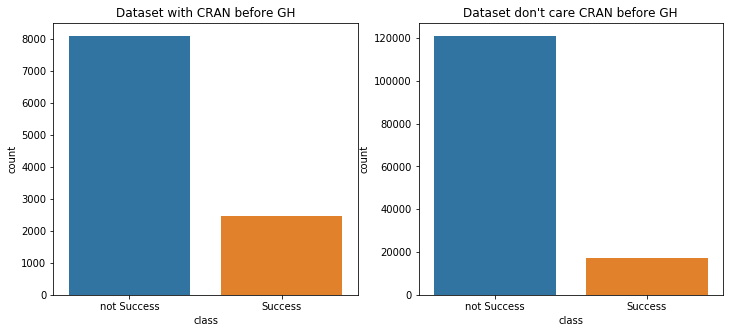

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [16]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.81097
Precision on train: 0.73780
Recall on train: 0.25385

Classification accuracy of the LogisticRegression classifier on val set: 0.78720
Precision on val: 0.74850
Recall on val: 0.23496


array([[1486,  125],
       [ 457,   42]])

In [13]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.45136815e-01 -1.68585176e-01 -1.42531351e-01 -1.43529745e-01
  -1.39762568e-01 -6.48098930e-02 -8.94714284e-02 -2.37123713e-02
  -3.79304549e-01 -3.01780153e-02 -3.01780153e-02 -2.71447235e-01
  -3.65619668e-01  8.73541694e-07 -3.72884131e-02 -3.34269571e-02
  -3.31433621e-02 -3.25911497e-02 -4.17189695e-02  3.23447386e-02
   7.36751861e-03 -9.89305126e-03  6.34222401e-02  2.18603244e-02
  -5.09104445e-02 -3.68659985e-02 -2.40414115e-02 -1.63749859e-02
  -4.14966097e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.05684946e-02 -3.70862313e-02
  -5.53915067e-02 -6.14801797e-04  2.16580770e-02 -2.96827184e-02
  -4.73556107e-04 -8.92517546e-02  6.58655557e-03  1.35749306e-02
   4.66384568e-02  4.40286643e-02 -5.30177346e-02 -7.61110890e-02
  -1.03897893e-02  3.03021599e-02  6.56804082e-02  1.26217785e-02
   1.24059588e-02 -3.43153863e-03 -7.35062969e-02 -7.12851574e-02
  -6.17505412e-02 -6.68631397e-02 -7.06630483e-02 -2.80958251e-02
  -2.76564

In [14]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [12]:
# lr = LogisticRegression(solver='lbfgs')
# lr.fit(X_tr, y_tr)
# predictions = lr.predict(X_tr)
# params = np.append(lr.intercept_, lr.coef_)
# newX = pd.DataFrame({"Constant":np.ones(len(X_tr))}).join(pd.DataFrame(X_tr.reset_index(drop=True)))
# MSE = (sum((y_tr-predictions)**2))/(len(newX)-len(newX.columns))


# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
# ts_b = params/ sd_b
# print(newX)
# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

# myDF3 = pd.DataFrame()
# myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
# print(myDF3)

In [13]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [17]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)



In [18]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.99542
Precision on train: 0.98883
Recall on train: 0.99091

Classification accuracy of the LogisticRegression classifier on val set: 0.98910
Precision on val: 0.97393
Recall on val: 0.98308


In [9]:
# display coef for logistic regression model
# print(lr.coef_)
# print(lr.intercept_)

In [10]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [23]:
c = np.logspace(-3, 2, num=40, base=10)
score_array = np.zeros((40,))
for n in range(len(c)):
    lr = LogisticRegression(C=c[n], solver='lbfgs')
    lr.fit(X_tr, y_tr)
    score_array[n] = lr.score(X_val, y_val)
    
print(score_array)

[0.84265403 0.88388626 0.95450237 0.98199052 0.98625592 0.98720379
 0.98957346 0.99004739 0.98957346 0.99004739 0.98957346 0.98957346
 0.99004739 0.98957346 0.98957346 0.98909953 0.99004739 0.98957346
 0.98957346 0.98957346 0.98957346 0.98957346 0.98957346 0.98909953
 0.98909953 0.98909953 0.98909953 0.98909953 0.98909953 0.98862559
 0.98862559 0.98815166 0.98815166 0.98815166 0.98720379 0.98720379
 0.98720379 0.98672986 0.98672986 0.98720379]


In [23]:
c

array([1.00000000e-05, 1.51177507e-05, 2.28546386e-05, 3.45510729e-05,
       5.22334507e-05, 7.89652287e-05, 1.19377664e-04, 1.80472177e-04,
       2.72833338e-04, 4.12462638e-04, 6.23550734e-04, 9.42668455e-04,
       1.42510267e-03, 2.15443469e-03, 3.25702066e-03, 4.92388263e-03,
       7.44380301e-03, 1.12533558e-02, 1.70125428e-02, 2.57191381e-02,
       3.88815518e-02, 5.87801607e-02, 8.88623816e-02, 1.34339933e-01,
       2.03091762e-01, 3.07029063e-01, 4.64158883e-01, 7.01703829e-01,
       1.06081836e+00, 1.60371874e+00, 2.42446202e+00, 3.66524124e+00,
       5.54102033e+00, 8.37677640e+00, 1.26638017e+01, 1.91448198e+01,
       2.89426612e+01, 4.37547938e+01, 6.61474064e+01, 1.00000000e+02])

In [26]:
c = [1.00000000e-05, 1.51177507e-05, 2.28546386e-05, 3.45510729e-05,
       5.22334507e-05, 7.89652287e-05, 1.19377664e-04, 1.80472177e-04,
       2.72833338e-04, 4.12462638e-04, 6.23550734e-04, 9.42668455e-04,
       1.42510267e-03, 2.15443469e-03, 3.25702066e-03, 4.92388263e-03,
       7.44380301e-03, 1.12533558e-02, 1.70125428e-02, 2.57191381e-02,
       3.88815518e-02, 5.87801607e-02, 8.88623816e-02, 1.34339933e-01,
       2.03091762e-01, 3.07029063e-01, 4.64158883e-01, 7.01703829e-01,
       1.06081836e+00, 1.60371874e+00, 2.42446202e+00, 3.66524124e+00,
       5.54102033e+00, 8.37677640e+00, 1.26638017e+01, 1.91448198e+01,
       2.89426612e+01, 4.37547938e+01, 6.61474064e+01, 1.00000000e+02]

In [27]:
score_array = [0.78842351, 0.78896279, 0.79129966, 0.79381629, 0.7999281,  0.82922883,
 0.86068668 ,0.8610462  ,0.86194499 ,0.86122596 ,0.86140572 ,0.86158548,
 0.86086644,0.86140572 ,0.86248427 ,0.86320331 ,0.86338307 ,0.8641021,
 0.86392234 ,0.86374258 ,0.86338307 ,0.86338307 ,0.86320331 ,0.86320331,
 0.86320331 ,0.86302355 ,0.86338307 ,0.86302355 ,0.86338307, 0.86302355,
 0.86302355 ,0.86302355 ,0.86320331 ,0.86320331 ,0.86338307 ,0.86374258,
 0.86338307 ,0.86356283 ,0.86338307 ,0.86338307]

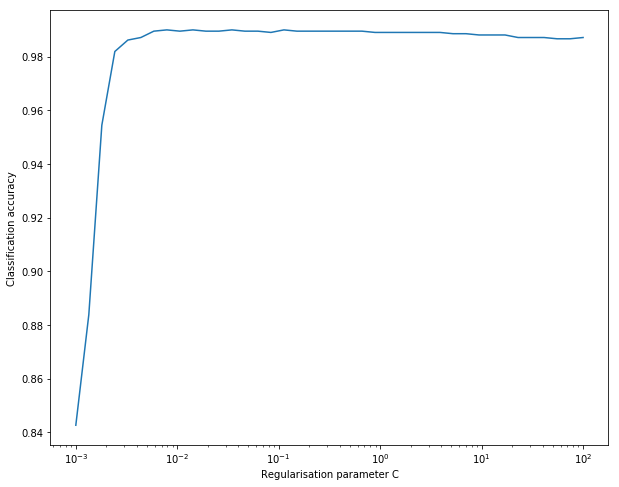

In [24]:
plt.figure(figsize=(10,8))
plt.semilogx(c, score_array, basex=10)
plt.xlabel('Regularisation parameter C')
plt.ylabel('Classification accuracy')
# plt.title('Classification accuracy against regularisation parameter C')
plt.show()

In [25]:
C_optimal = c[score_array.argmax()]
# C_optimal = 0.01125
print('Optimal C is : {:.5f}'.format(C_optimal))
lr = LogisticRegression(C=C_optimal, solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))

Optimal C is : 0.00790
Classification accuracy of the LogisticRegression classifier on training set: 0.99478
Precision on train: 0.98473
Recall on train: 0.99231
F1 on train: 0.98851

Classification accuracy of the LogisticRegression classifier on val set: 0.99005
Precision on val: 0.97403
Recall on val: 0.98684
F1 on val: 0.98039


In [22]:
lr = LogisticRegression(C=0.01, solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Classification accuracy of the LogisticRegression classifier on val set: 0.86410
Precision on val: 0.88267
Recall on val: 0.41441


In [11]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Accuracy score on the training dataset: 1.0
Precision on train: 1.00000
Recall on train: 1.00000

Accuracy score on the val dataset: 0.99005
Precision on val: 0.96203
Recall on val: 1.00000


In [42]:
rf = RandomForestClassifier(n_estimators=140, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred,y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))

y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
f1 = f1_score(y_pred=y_pred,y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
print('F1 on test: {:.5f}'.format(f1))

Accuracy score on the training dataset: 1.0
Precision on train: 1.00000
Recall on train: 1.00000
F1 on train: 1.00000

Accuracy score on the val dataset: 0.99100
Precision on val: 0.96552
Recall on val: 1.00000
F1 on val: 0.98246

Accuracy score on the test dataset: 0.99194
Precision on test: 0.96887
Recall on test: 0.99800
F1 on test: 0.98322


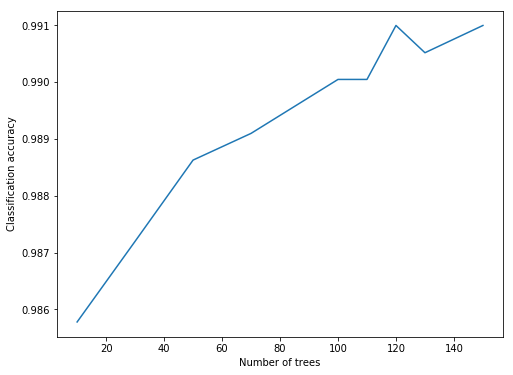

In [41]:
plt.figure(figsize=(8,6))
plt.plot([10,30,50,70,100,110,120,130,150], [0.98578, 0.98720, 0.98863, 0.98910, 0.99005,0.99005, 0.99100,0.99052, 0.99100])
plt.xlabel('Number of trees')
plt.ylabel('Classification accuracy')
# plt.title('Classification accuracy against regularisation parameter C')
plt.show()

In [13]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [43]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 20 most important features:')
for n in range(20):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 20 most important features:
1. num_joint_success_project
2. proj_span
3. normalized_proj_span
4. activity_intensity_Q4
5. activity_intensity_Q3
6. activity_intensity_Q1
7. activity_intensity_Q2
8. activity_intensity
9. max_contribution_percentage
10. num_Create_Q1
11. num_Push_Q3
12. num_Create_Q4
13. num_joint_project
14. num_PullRequest
15. num_Create_Q2
16. num_PullRequest_Q3
17. num_Push_Q4
18. num_Push_Q1
19. num_PullRequest_Q2
20. num_Push_Q2


In [15]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [44]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
ca = svc_linear.score(X_tr, y_tr)
print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_linear.score(X_val, y_val)
print('Linear SVC classification accuracy on val set: {:.5f}'.format(ca))
y_pred = svc_linear.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))

Linear SVC classification accuracy on training set: 0.99557
Linear SVC classification accuracy on val set: 0.99052
Precision on val: 0.97761
Recall on val: 0.98496
F1 on val: 0.98127


In [45]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_val, y_val)
print('Radial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
ca = svc_poly.score(X_tr, y_tr)
print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_poly.score(X_val, y_val)
print('Polynomial SVC classification accuracy on val set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.98957
Radial Basis Function SVC classification accuracy on val set: 0.96825

Polynomial SVC classification accuracy on training set: 0.80970
Polynomial SVC classification accuracy on test set: 0.77962


In [46]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1= f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))


Precision on train: 0.98164
Recall on train: 0.97203
F1 on train: 0.97681
Precision on val: 0.96970
Recall on val: 0.90226
F1 on val: 0.93476


In [71]:
y_pred = svc_poly.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1= f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = svc_poly.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))

Precision on train: 0.99423
Recall on train: 0.43755
F1 on train: 0.60767
Precision on val: 0.93177
Recall on val: 0.37034
F1 on val: 0.53002


In [47]:
# tune SVM rbf
C = np.logspace(-2, 1, 4)
gamma = np.logspace(-4, -1, 4)
score_array = np.zeros((4,4))


for i in range(len(C)):
    for j in range(len(gamma)):
        svc_rbf = SVC(C=C[i], kernel='linear', gamma=gamma[j])
        svc_rbf.fit(X_tr, y_tr)
        score_array[i][j] = svc_rbf.score(X_val, y_val)
print(score_array)

[[0.99004739 0.99004739 0.99004739 0.99004739]
 [0.99052133 0.99052133 0.99052133 0.99052133]
 [0.99052133 0.99052133 0.99052133 0.99052133]
 [0.98909953 0.98909953 0.98909953 0.98909953]]


In [82]:
# tune SVM rbf
C = np.logspace(-2, 1, 4)
gamma = np.logspace(-2, 1, 4)
score_array = np.zeros((4,4))


for i in range(len(C)):
    for j in range(len(gamma)):
        svc_rbf = SVC(C=C[i], kernel='rbf', gamma=gamma[j])
        svc_rbf.fit(X_tr, y_tr)
        score_array[i][j] = svc_rbf.score(X_val, y_val)
print(score_array)

[[0.85727126 0.84594643 0.82149919 0.78788424]
 [0.85924861 0.85834981 0.85367607 0.82922883]
 [0.86248427 0.86230451 0.86068668 0.85277728]
 [0.86176523 0.85763077 0.8482833  0.84360956]]


In [88]:
# tune SVM rbf
C = np.logspace(-3, -2, 1)
gamma = np.logspace(-2, 1, 4)
score_array = np.zeros((4,1))


for i in range(len(gamma)):
    for j in range(len(C)):
        svc_rbf = SVC(C=C[j], kernel='rbf', gamma=gamma[i])
        svc_rbf.fit(X_tr, y_tr)
        score_array[i][j] = svc_rbf.score(X_val, y_val)
        print(svc_rbf.score(X_val, y_val))
print(score_array)

0.7878842351249326
0.7878842351249326
0.7878842351249326
0.7878842351249326
[[0.78788424]
 [0.78788424]
 [0.78788424]
 [0.78788424]]


In [112]:
svc_rbf = SVC(C=10, kernel='rbf', gamma=0.001)
svc_rbf.fit(X_tr, y_tr)
a = svc_rbf.score(X_val, y_val)
print(a)

0.8614057163401042


In [96]:
score_array = [[0.78788424, 0.79759123, 0.85727126, 0.84594643],
 [0.79974834, 0.85924861, 0.85924861, 0.85834981],
 [0.85942837, 0.8601474,  0.86248427, 0.86230451],
 [0.8601474,  0.86140572, 0.86176523, 0.85763077]]
C = np.logspace(-3, 1, 5)
gamma = np.logspace(-2, 1, 4)
C

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [113]:
score_array = [[0.78788424,0.78788424,0.78988424,0.7988424,0.79788424],
               [0.7975912, 0.85727126, 0.84594643, 0.82149919, 0.78788424],
 [0.8592486, 0.85924861, 0.85834981, 0.85367607, 0.82922883],
 [0.8601474, 0.86248427, 0.86230451, 0.86068668, 0.85277728],
 [ 0.8614057,0.86176523, 0.85763077, 0.8482833,  0.84360956]
              ]
C = np.logspace(-3, 1, 5)
gamma = np.logspace(-3, 1, 5)

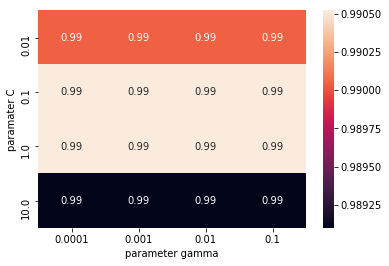

In [48]:
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=gamma, yticklabels=C)
plt.ylabel('paramater C')
plt.xlabel('parameter gamma')
# plt.title('Validation classification accuracy for all pairs of C and gamma')
plt.show()

In [80]:
svc_rbf = SVC(kernel='rbf', C=1.0, gamma=0.01)
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_val, y_val)
print('Radial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.88081
Radial Basis Function SVC classification accuracy on val set: 0.86248


In [81]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1= f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('F1 on train: {:.5f}'.format(f1))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('F1 on val: {:.5f}'.format(f1))


Precision on train: 0.98810
Recall on train: 0.44460
F1 on train: 0.61326
Precision on val: 0.97267
Recall on val: 0.36186
F1 on val: 0.52749


In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=201902)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
ca = mlp.score(X_tr, y_tr)
print('\nMLP classification accuracy on training set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = mlp.predict(X_val)
ca = mlp.score(X_val, y_val)
print('\nMLP classification accuracy on validation set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


MLP classification accuracy on training set: 0.99668
Precision on train: 0.98754
Recall on train: 0.99790

MLP classification accuracy on validation set: 0.98768
Precision on val: 0.96507
Recall on val: 0.98684


In [54]:
hidden_dim = np.array([10,50,100,150,200])

n_layer = np.array([2,5,10])


score_array = np.zeros((5,3))
for h in range(len(hidden_dim)):
    for n in range(len(n_layer)):
        h_l_z = np.repeat(hidden_dim[h], n_layer[n])
        mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=h_l_z, random_state=201902)
        mlp.fit(X_tr, y_tr)
        score_array[h][n] = mlp.score(X_val, y_val)

    
print(score_array)

[[0.98909953 0.99004739 0.98862559]
 [0.98483412 0.98530806 0.98672986]
 [0.98436019 0.98862559 0.98578199]
 [0.98767773 0.98530806 0.98625592]
 [0.98483412 0.98672986 0.98672986]]


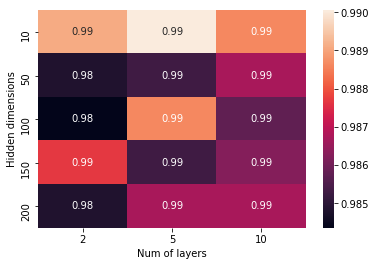

In [55]:
# score_array = [[0.86464,0.86428,0.86752,0.86177],
#     [0.86536,0.86823656, 0.8680568, 0.86733777],
#  [0.86051, 0.85834981, 0.85205824, 0.85852957],
#  [0.85296, 0.85403559, 0.84954161, 0.85924861],
#  [0.85961, 0.85205824, 0.84109294, 0.8561927 ],
#  [0.85655, 0.84972137, 0.84900234, 0.85097969]]
# hidden_dim = np.array([5,10,50,100,150,200])

# n_layer = np.array([1,2,5,10])
plt.figure()
sns.heatmap(score_array, annot=True, xticklabels=n_layer, yticklabels=hidden_dim)
plt.ylabel('Hidden dimensions')
plt.xlabel('Num of layers')
# plt.title('Validation classification accuracy for all pairs')
plt.show()

In [142]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=0.00001,hidden_layer_sizes=(10,10), random_state=201902)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
ca = mlp.score(X_tr, y_tr)
print('\nMLP classification accuracy on training set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
print('f1 on train: {:.5f}'.format(f1))

y_pred = mlp.predict(X_val)
ca = mlp.score(X_val, y_val)
print('\nMLP classification accuracy on validation set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
f1 = f1_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
print('f1 on val: {:.5f}'.format(f1))


MLP classification accuracy on training set: 0.89027
Precision on train: 0.90548
Recall on train: 0.54017
f1 on train: 0.67667

MLP classification accuracy on validation set: 0.86824
Precision on val: 0.84227
Recall on val: 0.46610
f1 on val: 0.60011
